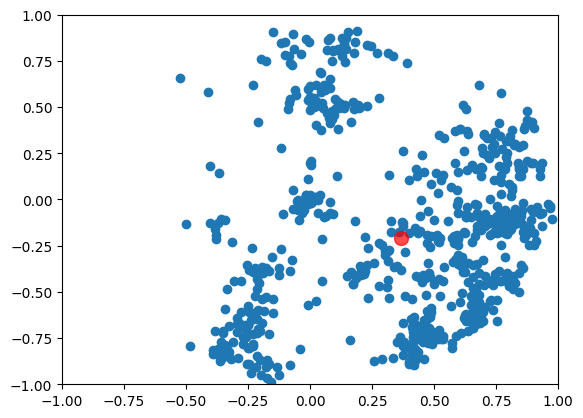

In [1]:
from shared_tools.make_datasets import x_train, y_train
from matplotlib import pyplot as plt
from typing import Iterable
import pickle, os
from deap import gp
from functools import partial
from run_gp import get_pset
aro, val = sum(a for a, _ in y_train) / len(y_train), sum(v for _, v in y_train) / len(y_train)

def show(a_v_pairs: list[tuple[float, float]]) -> None:
    plt.scatter([a for a, _ in a_v_pairs], [v for _, v in a_v_pairs])
    plt.scatter([aro], [val], s=100, color=(1, 0, 0, 0.7))
    plt.xlim((-1, 1))
    plt.ylim((-1, 1))
    plt.show()
show(y_train)

In [7]:
def models(dir_path: str, prefix='') -> list[gp.PrimitiveTree]:
    path = f"{dir_path}/data"
    compile = partial(gp.compile, pset=get_pset(dir_path))

    return [compile(pickle.load(open(f"{path}/{file}", 'rb'))) for file in os.listdir(path) if f'{prefix}best' in file]

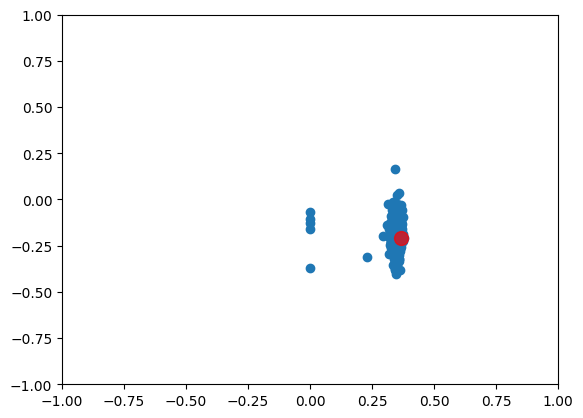

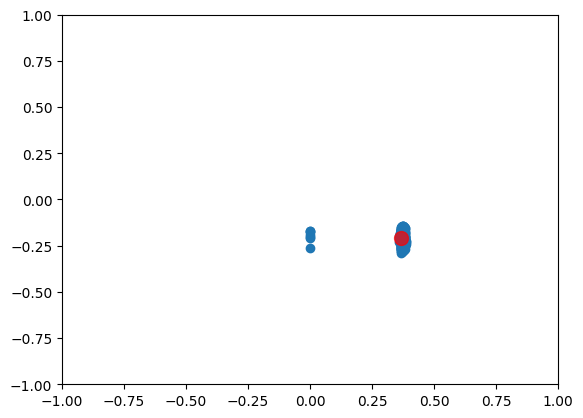

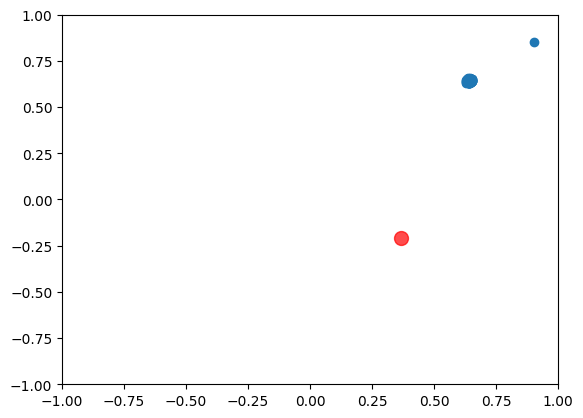

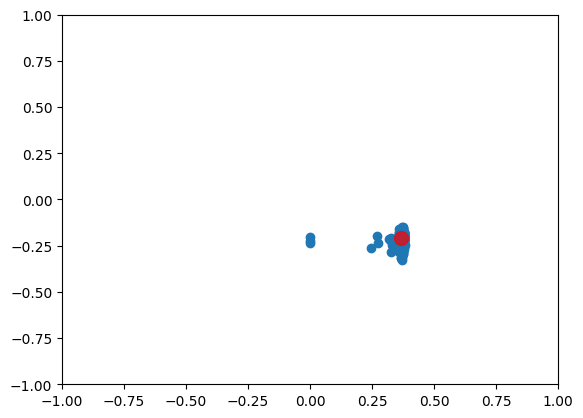

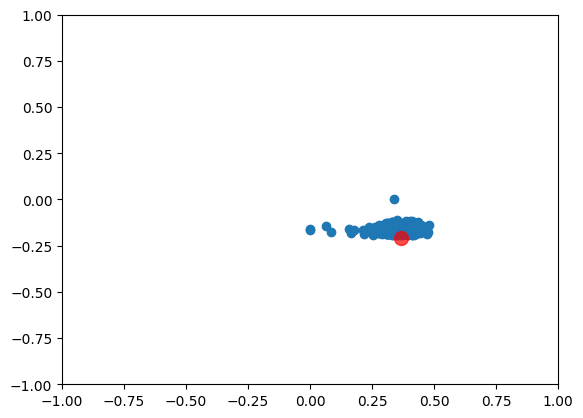

In [2]:
for simple_pred in models('simple_pred')[:5]:
    predictions = [simple_pred(img) for img in x_train]
    show(predictions)

In [11]:
for arousal_pred, val_pred in zip(models('MLGP', prefix='a'), models('MLGP', prefix='v'))[:5]:
    aro_predictions = [arousal_pred(img) for img in x_train]
    val_predictions = [val_pred(img) for img in x_train]
    show(list(zip(aro_predictions, val_predictions)))

TypeError: 'zip' object is not subscriptable